### fourier coefficients

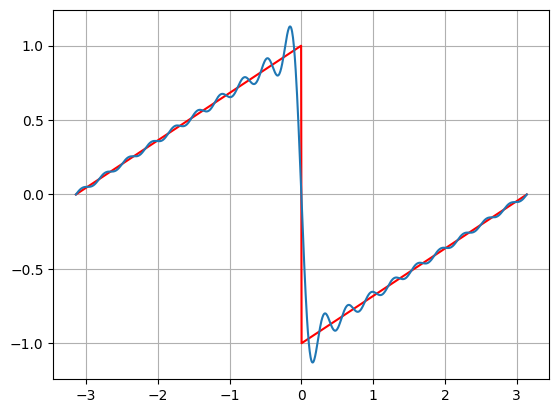

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from scipy.integrate import quad

L = np.pi

def sawtooth_func(x):
    return sawtooth(x, width = 1)


def an(n):
    integrand = lambda x: sawtooth_func(x) * np.cos(n*x) 
    ans = quad(integrand, -L, L)[0]
    return ans/L

def bn(n):
    integrand = lambda x: sawtooth_func(x) * np.sin(n*x) 
    bns = quad(integrand, -L, L)[0]
    return bns/L

N = 20
a = [an(n) for n in range(N)]
b = [bn(n) for n in range(N)]

def fourier(x, N):
    result = a[0]/2
    for i in range(N):
        result += (a[i]*np.cos(i*x) + b[i]*np.sin(i*x))

    return result

x = np.linspace(-L, L, 1000)
plt.plot(x, sawtooth_func(x), 'r-', label = 'original function')
plt.plot(x, fourier(x, 20), label = 'Fourier approximation')
plt.grid(True)

### legendre polynomials

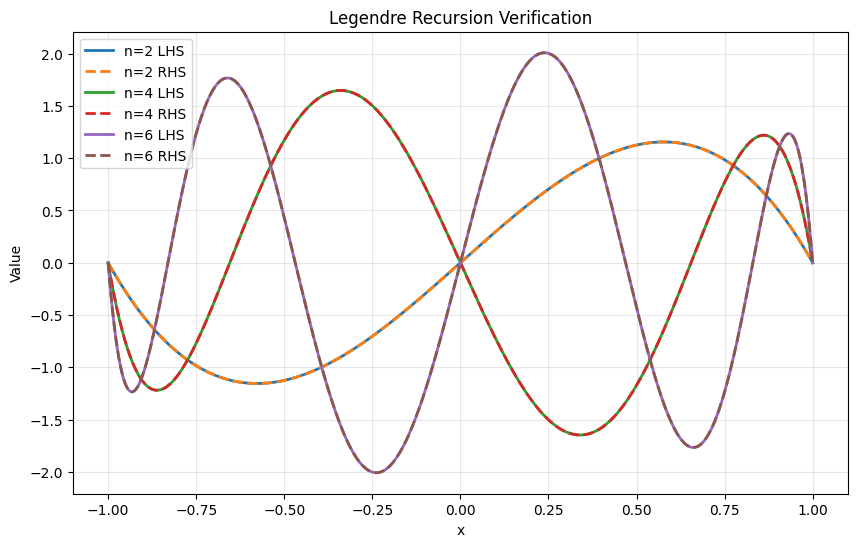

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

N = [2, 4, 6]
x = np.linspace(-1, 1, 1000)
dx = x[1] - x[0]  

plt.figure(figsize=(10, 6))

for n in N:
    Pn = legendre(n)
    Pn_plus1 = legendre(n+1)
    
    y = Pn(x)
    y_plus1 = Pn_plus1(x)
    
    Pn_prime = np.gradient(y, x)  
    
    lhs = (1 - x**2) * Pn_prime
    rhs = (n+1)*x*y - (n+1)*y_plus1
    
    plt.plot(x, lhs, '-', linewidth=2, label=f'n={n} LHS')
    plt.plot(x, rhs, '--', linewidth=2, label=f'n={n} RHS')

plt.xlabel('x')
plt.ylabel('Value')
plt.title('Legendre Recursion Verification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

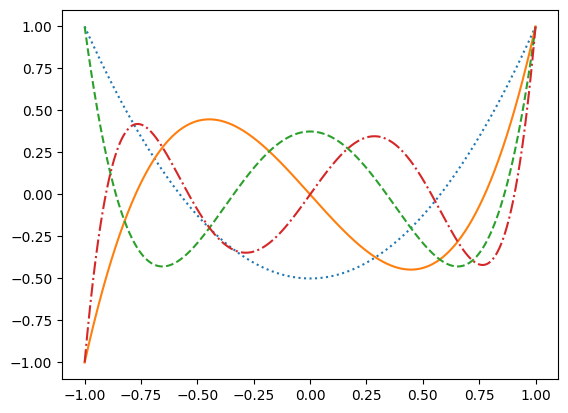

In [43]:
lines = [':', '-', '--', '-.']
x = np.linspace(-1, 1, 1000)
for i in range(2, 6):
    Pn = legendre(i)
    yPn = Pn(x)
    plt.plot(x, yPn, ls = lines[i-2])

### orthogonality conditions

In [49]:
m = 3
n = 3

Pm = legendre(m)
Pn = legendre(n)

f = lambda x: Pm(x) * Pn(x) 

val, _ = quad(f, -1, 1)   # numerical integral

# theoretical result
if m == n:
    check = 2 / (2*n + 1)
else:
    check = 0

print("Integral =", val)
print("Expected =", check)

Integral = 0.28571428571428575
Expected = 0.2857142857142857


In [56]:
from scipy.special import hermite
import math
m = 3
n = 3

Hm = hermite(m)
Hn = hermite(n)

f = lambda x: np.exp(-x**2) * Hm(x) * Hn(x) 

val, _ = quad(f, -np.inf, np.inf)   

if m == n:
    check = 2**n * math.factorial(n) * np.sqrt(np.pi)
else:
    check = 0

print("Integral =", val)
print("Expected =", check)

Integral = 85.07778484346483
Expected = 85.07778484346477


### wave equation

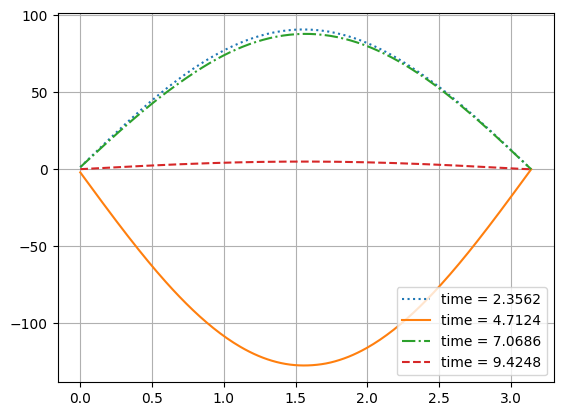

1274

In [65]:
c = 1
nx = 201
L = np.pi
x = np.linspace(0, L, nx)
dx = L/(nx - 1)

T = 10
r = 0.5
dt = r * dx / c
nt = int(T/dt) + 1


U = np.zeros((nx, nt))
U[0, :] = 0
U[-1, :] = 0

U[:, 0] = np.sin(x)
for i in range(1, nx - 1):
    U[i, 1] = U[i, 0] + 0.5 * r**2 * (U[i+1, 0] + U[i-1, 0] - 2*U[i,0])

for n in range(nt - 1):
    for i in range(nx - 1):
        U[i, n+1] = 2*U[i, n] - U[i, n-1] + (r**2) * (U[i+1, n] - 2*U[i, n] + U[i-1, n])

steps = [300, 600, 900, 1200]
lines = [':', '-', '-.','--']

for i in range(4):
    plt.plot(x, U[:,steps[i]], ls = lines[i], label = f'time = {np.round(dt*steps[i],4)}')

plt.legend()
plt.grid(True)
plt.show()
nt

### heat equation

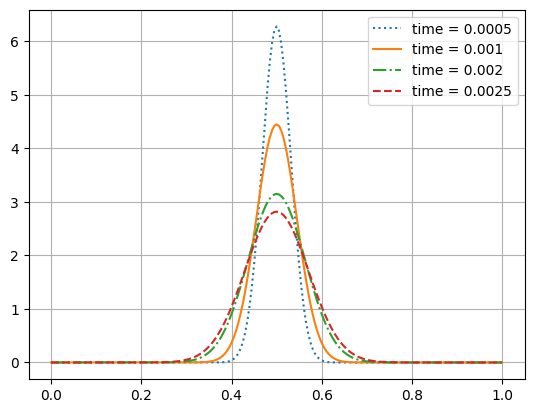

In [71]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0
T = 0.5
r = 0.4
a = 1

nx = 201
dx = L/(nx - 1)
x = np.linspace(0, L, nx)

dt = (r * dx**2)/a**2
nt = int((T/dt)+1)

U = np.zeros((nx, nt))

mid = (nx-1)/2
U[100, 0] = 100
U[0, :] = 0.0
U[-1, :] = 0.0

for n in range(0, nt-1):
    for i in range(1, nx-1):
        U[i, n+1] = U[i, n] + r*(U[i+1, n] + U[i-1, n] - 2*U[i, n])

lines = [':', '-', '-.', '--']
times = [50, 100, 200, 250]

for i in range(4):
    plt.plot(x, U[:, times[i]], ls = lines[i], label = f'time = {np.round((dt * times[i]), 4)}')

plt.legend()
plt.grid(True)
plt.show()

In [72]:
#heat

U[i, n+1] = U[i, n] + r*(U[i+1, n] + U[i-1, n] - 2*U[i,n])

#wave 1st time step

U[i, 1] = U[i, 0] + 0.5 * r**2 * (U[i+1, 0] + U[i-1, 0] - 2*U[i,0])

#wave general

U[i, n+1] = 2*U[i, n] - U[i, n-1] + r**2 * (U[i+1, n] + U[i-1, n] - 2*U[i,n])

### curve fitting

In [73]:
# Define quadratic model
def model(x, a, b, c):
    return a*x**2 + b*x + c

# Generate data
xdata = np.linspace(-5, 5, 50)
ytrue = 2*xdata**2 - 3*xdata + 5   # true relation
noise = 3 * np.random.normal(size=len(xdata))
ydata = ytrue + noise  

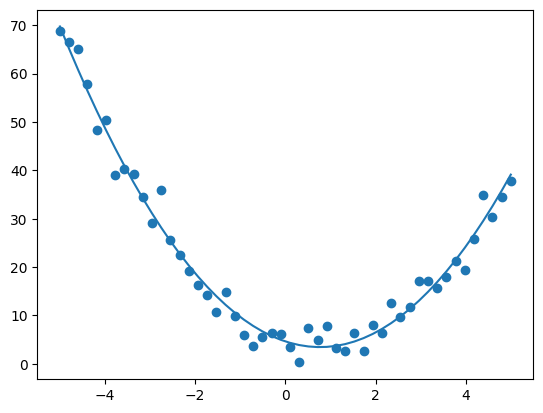

In [74]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(model, xdata, ydata)
afit, bfit, cfit = popt
yfit = model(xdata, afit, bfit, cfit)
plt.scatter(xdata, ydata)
plt.plot(xdata, yfit)

### interpolation

In [76]:
from scipy.interpolate import lagrange

x = [1, 3, 6, 7, 78, 4, 42, 45]
y = np.exp(x)

poly = lagrange(x, y)
poly.coef

array([ 2.88920657e+21, -3.12034310e+23,  1.12158999e+25, -1.57866247e+26,
        1.05331515e+27, -3.49031178e+27,  5.33609874e+27, -2.75214261e+27])

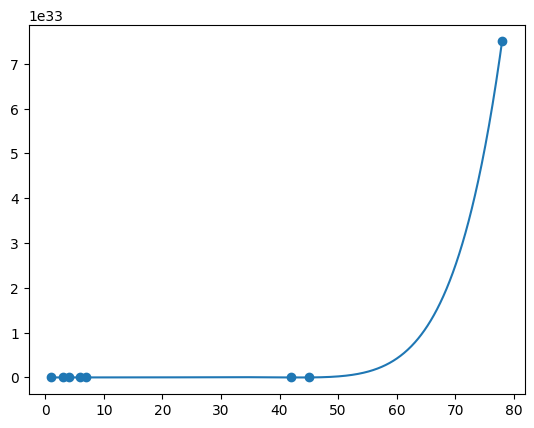

In [78]:
xin = np.linspace(1, 78, 1000)
yin = poly(xin)
plt.scatter(x, y)
plt.plot(xin, yin)

### odeint

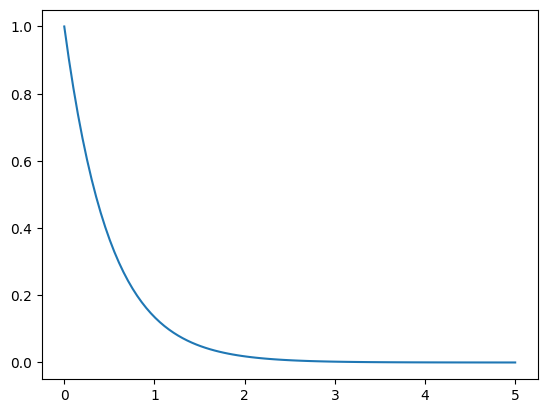

In [81]:
from scipy.integrate import odeint

def f(y, x):
    return -2*y

y0 = 1
x = np.linspace(0, 5, 100)
y = odeint(f, y0, x)
plt.plot(x, solution)

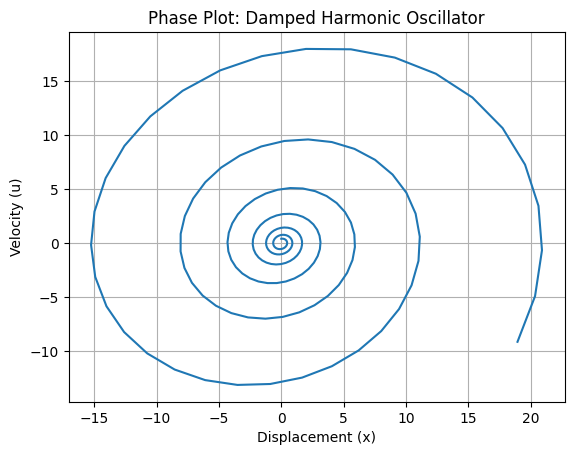

In [87]:
#Phase Plot of Damped Harmonic Oscillator
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

x0 = 0.0
u0 = 0.4
k = 1.0
b = 0.2
t0 = 0
tn = 40

def system(state, t):
    x, u = state
    dxdt = u
    dudt = -k*x + b*u
    return [dxdt, dudt]

t = np.linspace(t0, tn, 201)
solution = odeint(system, [x0, u0], t)
x_vals = solution[:, 0]
u_vals = solution[:, 1]

plt.plot(x_vals, u_vals)
plt.xlabel("Displacement (x)")
plt.ylabel("Velocity (u)")
plt.title("Phase Plot: Damped Harmonic Oscillator")
plt.grid(True)
plt.show()

In [93]:
import numpy as np
from scipy.integrate import quad, simpson, trapezoid
import matplotlib.pyplot as plt

# example function
f = lambda x: np.sin(x)
x = np.linspace(0, np.pi, 100)

# 1. quad (adaptive)
result_quad, error = quad(f, 0, np.pi)
print("quad result:", result_quad)

# 2. trapezoidal rule
result_trapz = trapezoid(f(x), x)
print("trapz result:", result_trapz)

# 3. Simpson's rule
result_simps = simpson(f(x), x)
print("simps result:", result_simps)


quad result: 2.0
trapz result: 1.9998321638939927
simps result: 2.0000000534993037


### improper integral from 0 to infinity

Result from Gauss Quadrature: 1.6449340607554581
Result from quad: 1.6449340668482264
Analytical Result: 1.6449340668482264


/tmp/ipykernel_186771/535691986.py:5: RuntimeWarning: overflow encountered in exp
  return x/(np.exp(x) - 1)


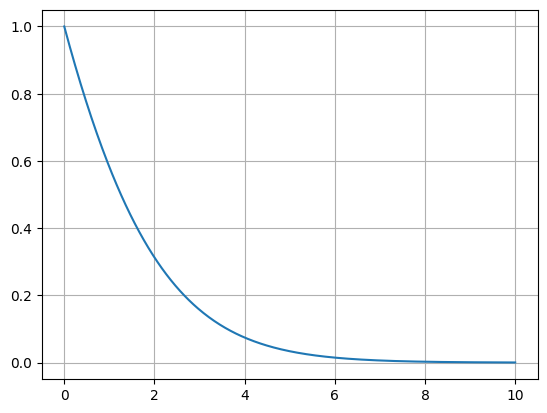

In [97]:
n = 32
xs, ws = np.polynomial.legendre.leggauss(n)

def f2(x):
    return x/(np.exp(x) - 1)

a = 0
b = np.inf
ts = (1 + xs)/(1 -xs)
ys = f2(ts) * (2/(1 - xs)**2)
Inte = np.sum(ws * ys) 
print(f"Result from Gauss Quadrature: {Inte}")
print(f"Result from quad: {quad(f2, 0, np.inf)[0]}")
print(f"Analytical Result: {(np.pi**2)/6}")

x = np.linspace(1e-6, 10, 500)
y = f2(x)
plt.plot(x, y)
plt.grid(True)
plt.show()

### range - to + infinity 

In [98]:
import numpy as np
from scipy.integrate import quad

n = 32
xs, ws = np.polynomial.legendre.leggauss(n)
a = 1.0
b = 1.0
c = 0.5

def f(x):
    return np.exp(-a*x**2 + b*x + c)

ts = xs / (1 - xs**2)  
jacobian = (1 + xs**2) / (1 - xs**2)**2

ys = f(ts) * jacobian
Inte = np.sum(ws * ys)

print(f"Gauss Quadrature result: {Inte}")
Int_quad, error = quad(f, -np.inf, np.inf)
analytic = math.sqrt(math.pi / a) * math.exp((b**2)/(4*a) + c)

print("Result from quad (infinite limits): ", Int_quad)
print("Analytical result:                  ", analytic)

Gauss Quadrature result: 3.752340314507651
Result from quad (infinite limits):  3.7522848318121778
Analytical result:                   3.7522848318121764
